Imported necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
from scipy import stats
import seaborn as sns

Loaded the data

In [2]:
data = pd.read_csv("continuous dataset.csv")
data.head()

,datetime,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
0,2015-01-03 01:00:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0,0,0
1,2015-01-03 02:00:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471,0,0,0
2,2015-01-03 03:00:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,0.078735,5.871184,0,0,0
3,2015-01-03 04:00:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,0.068390,5.883621,0,0,0
4,2015-01-03 05:00:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,0.064362,5.611724,0,0,0


Checking the dimensions (number of rows and columns) of the dataset

In [3]:
data.shape

(48048, 17)

A summary of the dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48048 entries, 0 to 48047
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    48048 non-null  object 
 1   nat_demand  48048 non-null  float64
 2   T2M_toc     48048 non-null  float64
 3   QV2M_toc    48048 non-null  float64
 4   TQL_toc     48048 non-null  float64
 5   W2M_toc     48048 non-null  float64
 6   T2M_san     48048 non-null  float64
 7   QV2M_san    48048 non-null  float64
 8   TQL_san     48048 non-null  float64
 9   W2M_san     48048 non-null  float64
 10  T2M_dav     48048 non-null  float64
 11  QV2M_dav    48048 non-null  float64
 12  TQL_dav     48048 non-null  float64
 13  W2M_dav     48048 non-null  float64
 14  Holiday_ID  48048 non-null  int64  
 15  holiday     48048 non-null  int64  
 16  school      48048 non-null  int64  
dtypes: float64(13), int64(3), object(1)
memory usage: 6.2+ MB


Checking the missing values

In [5]:
data.isnull().sum()

datetime      0
nat_demand    0
T2M_toc       0
QV2M_toc      0
TQL_toc       0
W2M_toc       0
T2M_san       0
QV2M_san      0
TQL_san       0
W2M_san       0
T2M_dav       0
QV2M_dav      0
TQL_dav       0
W2M_dav       0
Holiday_ID    0
holiday       0
school        0
dtype: int64

Descriptive statistics for the numerical columns in the dataset

In [6]:
data.describe()

,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
count,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000
mean,1182.868647,27.399111,0.018313,0.079979,13.391049,26.921023,0.017844,0.106265,7.046675,24.719513,0.016867,0.144681,3.567589,0.704795,0.062937,0.727793
std,192.068896,1.675462,0.001607,0.065589,7.295502,3.018129,0.001889,0.086293,4.103711,2.414019,0.001584,0.087899,1.710522,3.147470,0.242852,0.445100
min,85.192500,22.953455,0.012054,0.000000,0.008979,19.765222,0.010247,0.000009,0.060394,19.933740,0.009655,0.000032,0.015497,0.000000,0.000000,0.000000
25%,1020.056900,26.160455,0.017236,0.026451,7.544958,24.769281,0.016584,0.036819,3.955051,22.954652,0.015800,0.075775,2.298887,0.000000,0.000000,0.000000
50%,1168.427700,27.118051,0.018590,0.065201,12.182103,26.167352,0.018351,0.085968,5.992762,24.001718,0.017167,0.130188,3.413994,0.000000,0.000000,1.000000
75%,1327.563950,28.558344,0.019521,0.117310,18.661282,28.712335,0.019242,0.157288,9.409871,26.243402,0.018067,0.200012,4.670628,0.000000,0.000000,1.000000
max,1754.882000,35.039575,0.022690,0.521240,39.229726,39.063440,0.022165,0.484985,24.483937,34.216211,0.021066,0.477783,10.288902,22.000000,1.000000,1.000000


Removed the row at index 48047 from the dataset, which is useful for cleaning the data by eliminating potentially erroneous or irrelevant entries.

In [7]:
data.drop(data.index[48047],inplace = True)

A function to extract the first 10 characters from the datetime column and applied this function to the column, effectively converting it to a standard date format for easier analysis and manipulation.

In [8]:
def date(x):
    x = str(x)
    return(x[:10])

data["datetime"] = data["datetime"].apply(date)

data.head()

,datetime,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
0,2015-01-03,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0,0,0
1,2015-01-03,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471,0,0,0
2,2015-01-03,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,0.078735,5.871184,0,0,0
3,2015-01-03,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,0.068390,5.883621,0,0,0
4,2015-01-03,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,0.064362,5.611724,0,0,0


Initialized an empty DataFrame called daily_data with specified columns and then groups the original data by the datetime column; 
It iterates through each group to calculate the total nat_demand and the mean values for various temperature and demand features for each unique date, effectively aggregating the data on a daily basis to facilitate further analysis.

In [9]:
# Initialize an empty DataFrame
daily_data = pd.DataFrame(columns=[
    "date", "nat_demand", "T2M_toc", "QV2M_toc", "TQL_toc", "W2M_toc", 
    "T2M_san", "QV2M_san", "TQL_san", "W2M_san", "T2M_dav", "QV2M_dav", 
    "TQL_dav", "W2M_dav", "holiday", "school"
])

# Grouping by datetime
elect = data.groupby(["datetime"])

# Iterate through each group
for name, group in elect:
    new_row = {
        "date": name,
        "nat_demand": sum(group["nat_demand"]),
        "T2M_toc": np.mean(group["T2M_toc"]),
        "QV2M_toc": np.mean(group["QV2M_toc"]),
        "TQL_toc": np.mean(group["TQL_toc"]),
        "W2M_toc": np.mean(group["W2M_toc"]),
        "T2M_san": np.mean(group["T2M_san"]),
        "QV2M_san": np.mean(group["QV2M_san"]),
        "TQL_san": np.mean(group["TQL_san"]),
        "W2M_san": np.mean(group["W2M_san"]),
        "T2M_dav": np.mean(group["T2M_dav"]),
        "QV2M_dav": np.mean(group["QV2M_dav"]),
        "TQL_dav": np.mean(group["TQL_dav"]),
        "W2M_dav": np.mean(group["W2M_dav"]),
        "holiday": np.mean(group["holiday"]),
        "school": np.mean(group["school"])
    }

    # Convert new_row to a DataFrame and concatenate
    new_row_df = pd.DataFrame([new_row])
    daily_data = pd.concat([daily_data, new_row_df], ignore_index=True)

# Check the resulting daily_data DataFrame
print(daily_data.head())

            date  nat_demand    T2M_toc  QV2M_toc   TQL_toc    W2M_toc  \
0  (2015-01-03,)  24593.1315  27.837319  0.018599  0.006561  22.589990   
1  (2015-01-04,)  24194.9663  27.385723  0.017987  0.003788  23.531261   
2  (2015-01-05,)  27520.3902  27.174477  0.017905  0.013344  26.775680   
3  (2015-01-06,)  27441.4663  27.003596  0.017390  0.010847  26.491710   
4  (2015-01-07,)  27458.3716  26.678420  0.017242  0.017465  23.896604   

     T2M_san  QV2M_san   TQL_san    W2M_san    T2M_dav  QV2M_dav   TQL_dav  \
0  26.481001  0.018191  0.010949  11.127839  24.812523  0.017021  0.089999   
1  26.250307  0.017811  0.013746  12.090789  24.195294  0.016846  0.104575   
2  26.022784  0.017341  0.016091  14.204462  24.078774  0.016196  0.098414   
3  25.909521  0.017176  0.015202  13.804753  23.811539  0.016012  0.096998   
4  25.205438  0.016665  0.025092  13.041186  23.243199  0.015415  0.104125   

    W2M_dav  holiday  school  
0  4.377435      0.0     0.0  
1  4.964404      0.0    

Created a line plot to visualize the national demand over time by plotting the nat_demand column from the daily_data DataFrame, which helps in understanding trends and fluctuations in electricity demand throughout the observation period.

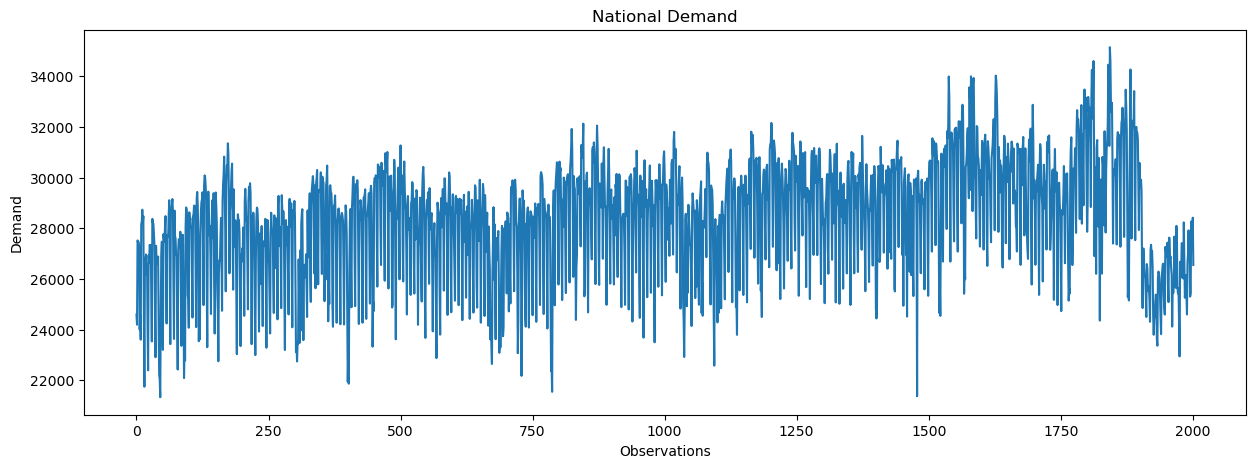

In [10]:
plt.figure(figsize = (15,5))
daily_data["nat_demand"].plot()

plt.xlabel("Observations")
plt.ylabel("Demand")
plt.title("National Demand")
plt.show()


Splitted the date column in the daily_data DataFrame into separate columns for day, month, and year, facilitating easier manipulation and analysis of the date components in subsequent steps.

In [11]:
#Splitting the date column in date, month and year

def day(x):
    return(x[8:])

def month(x):
    return(x[5:7])

def year(x):
    return(x[0:4])

daily_data["day"] =  daily_data["date"].apply(day)
daily_data["month"] =  daily_data["date"].apply(month)
daily_data["year"] =  daily_data["date"].apply(year)

This function displays the first five rows of the daily_data DataFrame, allowing us to quickly inspect the structure and content of the data, including the newly added columns for day, month, and year.

In [12]:
daily_data.head()

,date,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,holiday,school,day,month,year
0,"(2015-01-03,)",24593.1315,27.837319,0.018599,0.006561,22.589990,26.481001,0.018191,0.010949,11.127839,24.812523,0.017021,0.089999,4.377435,0.0,0.0,(),(),"(2015-01-03,)"
1,"(2015-01-04,)",24194.9663,27.385723,0.017987,0.003788,23.531261,26.250307,0.017811,0.013746,12.090789,24.195294,0.016846,0.104575,4.964404,0.0,0.0,(),(),"(2015-01-04,)"
2,"(2015-01-05,)",27520.3902,27.174477,0.017905,0.013344,26.775680,26.022784,0.017341,0.016091,14.204462,24.078774,0.016196,0.098414,7.180470,0.0,0.0,(),(),"(2015-01-05,)"
3,"(2015-01-06,)",27441.4663,27.003596,0.017390,0.010847,26.491710,25.909521,0.017176,0.015202,13.804753,23.811539,0.016012,0.096998,6.958897,0.0,0.0,(),(),"(2015-01-06,)"
4,"(2015-01-07,)",27458.3716,26.678420,0.017242,0.017465,23.896604,25.205438,0.016665,0.025092,13.041186,23.243199,0.015415,0.104125,6.984514,0.0,0.0,(),(),"(2015-01-07,)"


Created a 3x2 grid of line plots for national demand across different months and years, allowing for visual comparison of trends in national demand for the specified months (January 2015, April 2016, June 2017, September 2018, November 2019, and February 2020). Each subplot focuses on a specific month of a specific year, providing insights into seasonal or annual variations in demand.

Text(0.5, 1.0, '02/2020')

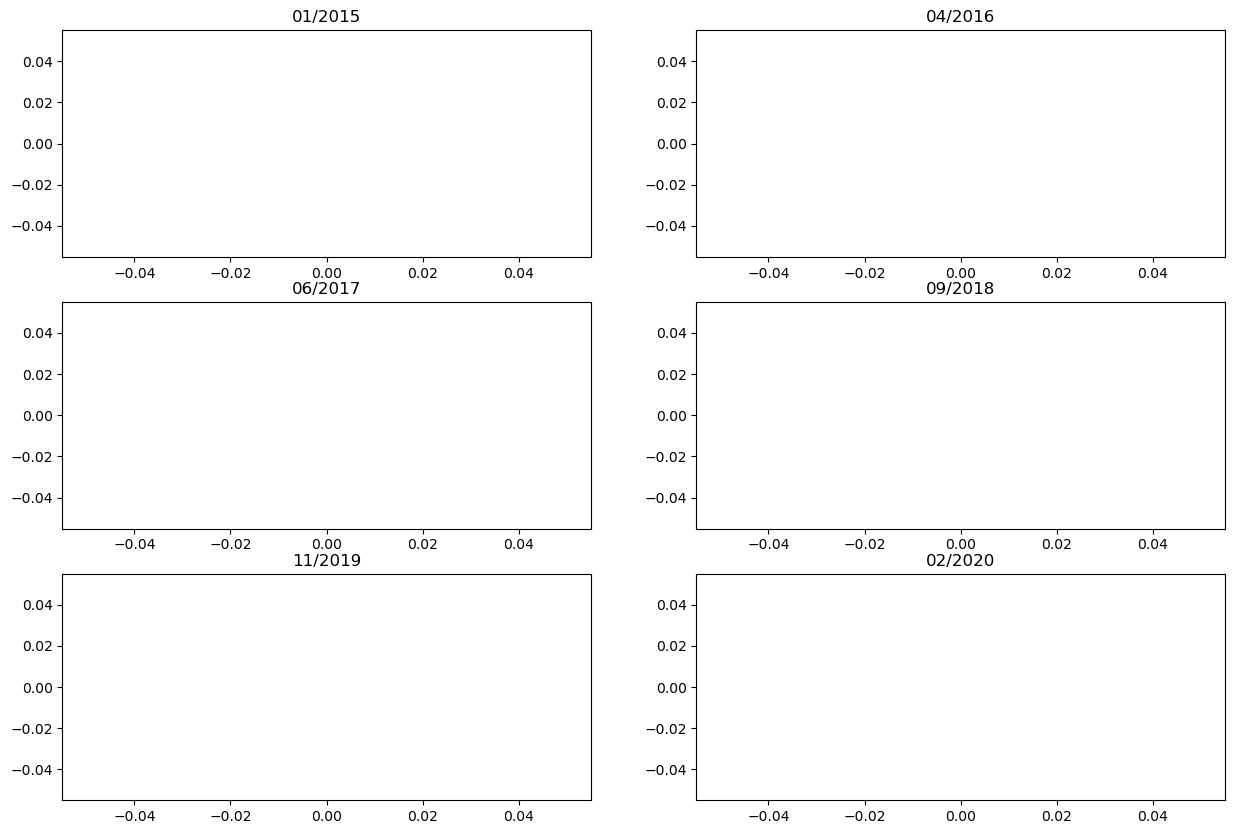

In [13]:
figure = plt.figure(figsize=(15,10))
plt.subplot(3,2,1)
plt.plot(daily_data["day"][daily_data["year"]=="2015"][daily_data["month"] == "01"], 
            daily_data["nat_demand"][daily_data["year"]=="2015"][daily_data["month"] == "01"],color="red")

plt.title("01/2015")

plt.subplot(3,2,2)
plt.plot(daily_data["day"][daily_data["year"]=="2016"][daily_data["month"] == "04"], 
            daily_data["nat_demand"][daily_data["year"]=="2016" ][daily_data["month"] == "04"],color="red")

plt.title("04/2016")


plt.subplot(3,2,3)
plt.plot(daily_data["day"][daily_data["year"]=="2017"][daily_data["month"] == "06"], 
            daily_data["nat_demand"][daily_data["year"]=="2017"][daily_data["month"] == "06"],color="red")
plt.title("06/2017")

plt.subplot(3,2,4)
plt.plot(daily_data["day"][daily_data["year"]=="2018"][daily_data["month"] == "09"], 
            daily_data["nat_demand"][daily_data["year"]=="2018" ][daily_data["month"] == "09"],color="red")
plt.title("09/2018")

plt.subplot(3,2,5)
plt.plot(daily_data["day"][daily_data["year"]=="2019"][daily_data["month"] == "11"], 
            daily_data["nat_demand"][daily_data["year"]=="2019" ][daily_data["month"] == "11"],color="red")
plt.title("11/2019")

plt.subplot(3,2,6)
plt.plot(daily_data["day"][daily_data["year"]=="2020"][daily_data["month"] == "02"], 
            daily_data["nat_demand"][daily_data["year"]=="2020" ][daily_data["month"] == "02"],color="red")
plt.title("02/2020")

This code identified and separated indices for Saturdays, Sundays, and weekdays within the daily_data DataFrame, and subsequently plots national electricity demand for each category with distinct colors. The resulting visualization helps to analyze and compare patterns in electricity demand across different days of the week, facilitating insights into how demand varies between weekdays and weekends.

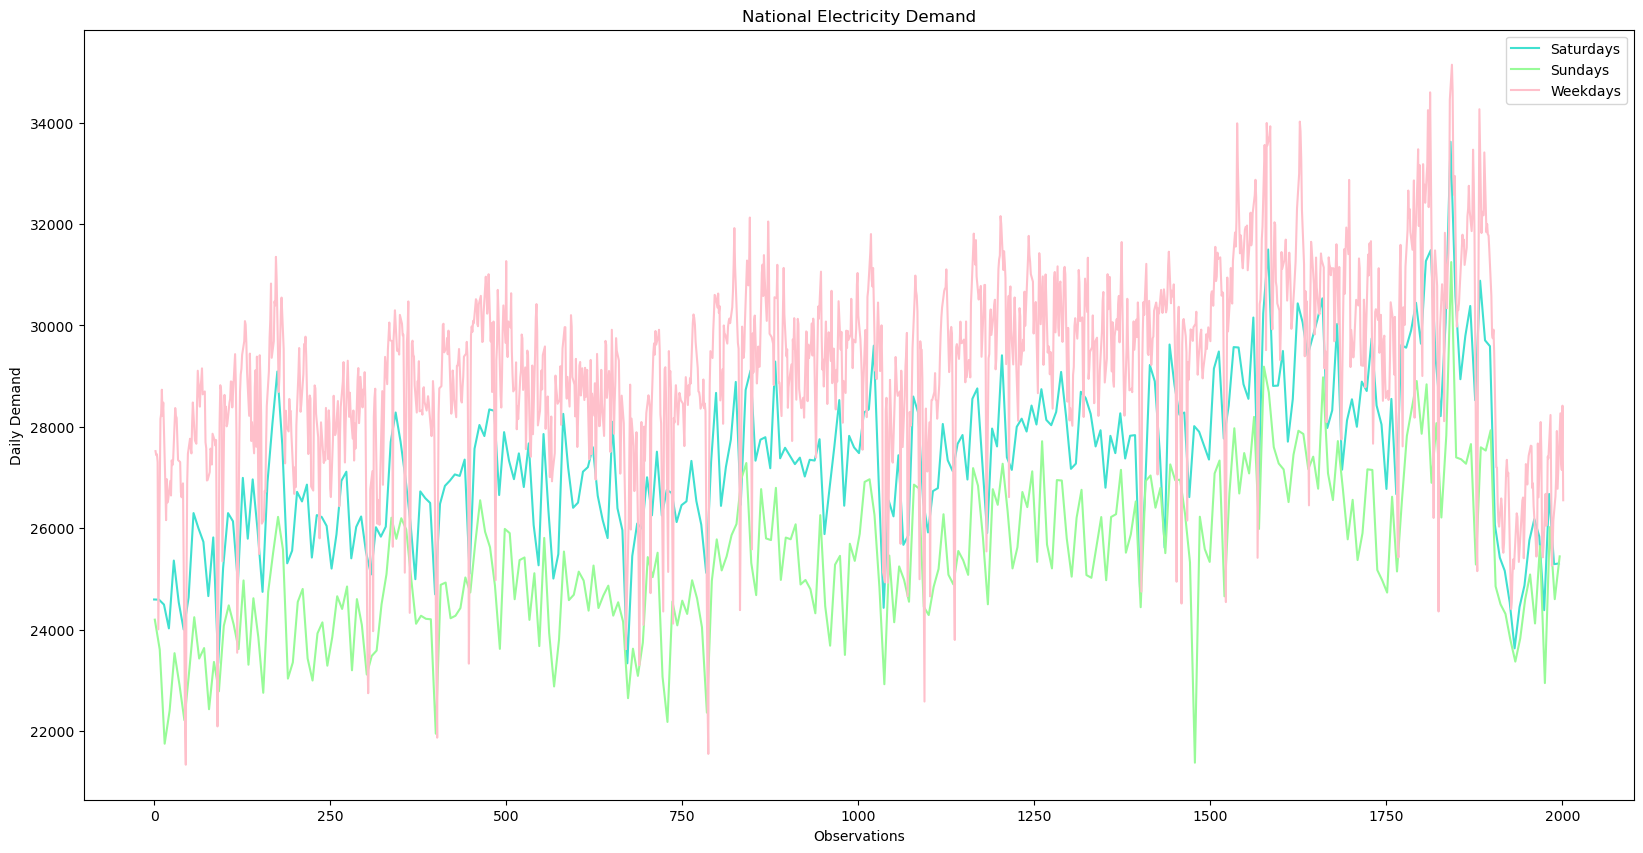

In [14]:
saturdays = list()
for i in range(0,daily_data.index.stop,7):
    saturdays.append(i)
    
#daily_data.loc[saturdays,"holiday"] = 1

sundays = list()
for i in range(1,daily_data.index.stop,7):
    sundays.append(i)
    
#daily_data.loc[sundays,"holiday"] = 1

weekdays = list()
for i in range(0,daily_data.index.stop):
    if i not in saturdays and i not in sundays:
        weekdays.append(i)
    else:
        continue



figure = plt.figure(figsize=(20,10))
daily_data.loc[saturdays,"nat_demand"].plot(color="turquoise")
daily_data.loc[sundays,"nat_demand"].plot(color="palegreen")
daily_data.loc[weekdays,"nat_demand"].plot(color="pink")
plt.xlabel("Observations")
plt.ylabel("Daily Demand")
plt.legend(["Saturdays","Sundays","Weekdays"])
plt.title("National Electricity Demand")

plt.show()

Created three new binary columns in the daily_data DataFrame to indicate whether each day is a Sunday, Saturday, or a weekday, using lists of 1s and 0s. By adding these columns, the dataset becomes more informative for subsequent analyses, allowing for easier filtering and examination of demand patterns based on the day type.

In [15]:
Sunday = [1 if j in sundays else 0 for j in range (0,daily_data.index.stop)]
Saturday = [1 if j in saturdays else 0 for j in range (0,daily_data.index.stop)]
Weekday = [1 if j in weekdays else 0 for j in range (0,daily_data.index.stop)]

daily_data["Sunday"] = Sunday
daily_data["Saturday"] = Saturday
daily_data["Weekday"] = Weekday

daily_data.head()

,date,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,...,TQL_dav,W2M_dav,holiday,school,day,month,year,Sunday,Saturday,Weekday
0,"(2015-01-03,)",24593.1315,27.837319,0.018599,0.006561,22.589990,26.481001,0.018191,0.010949,11.127839,...,0.089999,4.377435,0.0,0.0,(),(),"(2015-01-03,)",0,1,0
1,"(2015-01-04,)",24194.9663,27.385723,0.017987,0.003788,23.531261,26.250307,0.017811,0.013746,12.090789,...,0.104575,4.964404,0.0,0.0,(),(),"(2015-01-04,)",1,0,0
2,"(2015-01-05,)",27520.3902,27.174477,0.017905,0.013344,26.775680,26.022784,0.017341,0.016091,14.204462,...,0.098414,7.180470,0.0,0.0,(),(),"(2015-01-05,)",0,0,1
3,"(2015-01-06,)",27441.4663,27.003596,0.017390,0.010847,26.491710,25.909521,0.017176,0.015202,13.804753,...,0.096998,6.958897,0.0,0.0,(),(),"(2015-01-06,)",0,0,1
4,"(2015-01-07,)",27458.3716,26.678420,0.017242,0.017465,23.896604,25.205438,0.016665,0.025092,13.041186,...,0.104125,6.984514,0.0,0.0,(),(),"(2015-01-07,)",0,0,1


Generated scatter plots for each year from 2015 to 2018, displaying the relationship between the month and national demand. By visualizing this relationship, we can identify trends and patterns in electricity consumption over the months of each year, providing insights into seasonal variations in demand.

Text(0.5, 1.0, '2018')

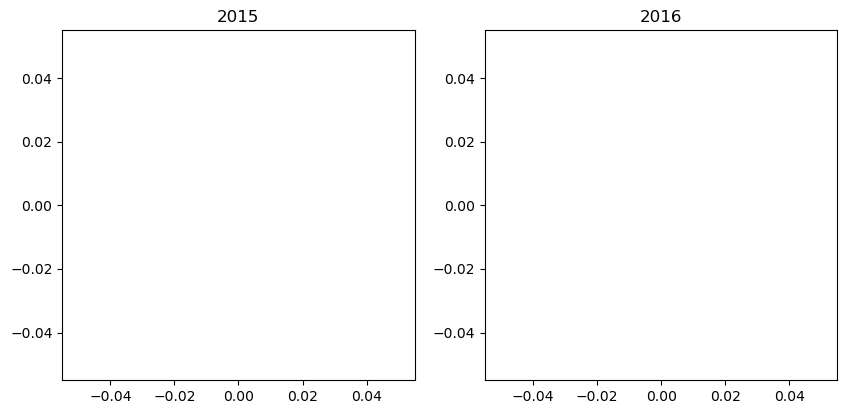

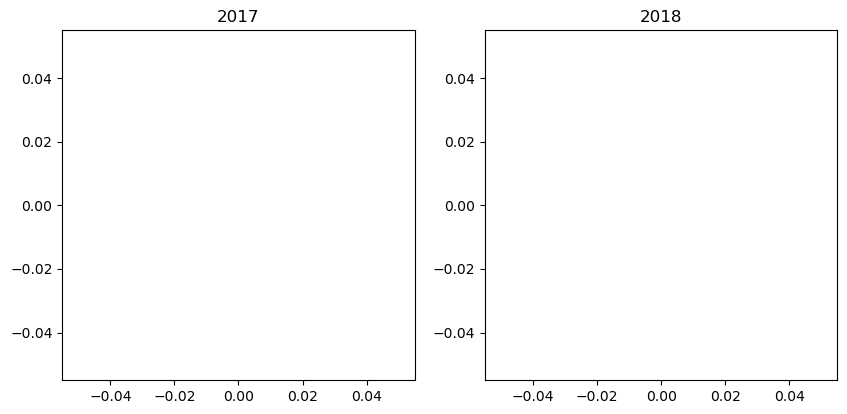

In [16]:
figure = plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.scatter(daily_data["month"][daily_data["year"]=="2015"], daily_data["nat_demand"][daily_data["year"]=="2015"],color="orange")
plt.title("2015")

plt.subplot(2,2,2)
plt.scatter(daily_data["month"][daily_data["year"]=="2016"], daily_data["nat_demand"][daily_data["year"]=="2016"],color="orange")
plt.title("2016")

figure = plt.figure(figsize=(10,10))
plt.subplot(2,2,3)
plt.scatter(daily_data["month"][daily_data["year"]=="2017"], daily_data["nat_demand"][daily_data["year"]=="2017"],color="orange")
plt.title("2017")

plt.subplot(2,2,4)
plt.scatter(daily_data["month"][daily_data["year"]=="2018"], daily_data["nat_demand"][daily_data["year"]=="2018"],color="orange")
plt.title("2018")